In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import decimate, find_peaks_

with open("data/mobile/test_filtered_audio.pickle", "rb") as handle:
    clicker_dict = pickle.load(handle)

clicker_dict

{'clicker': tensor([[-1.8618e-07,  5.4203e-07, -8.6535e-07,  ...,  5.4206e-04,
           1.3050e-04, -4.9369e-04]]),
 'sample_rate': 44100}

In [2]:
filtered_audio = clicker_dict["clicker"]
sample_rate = clicker_dict["sample_rate"]

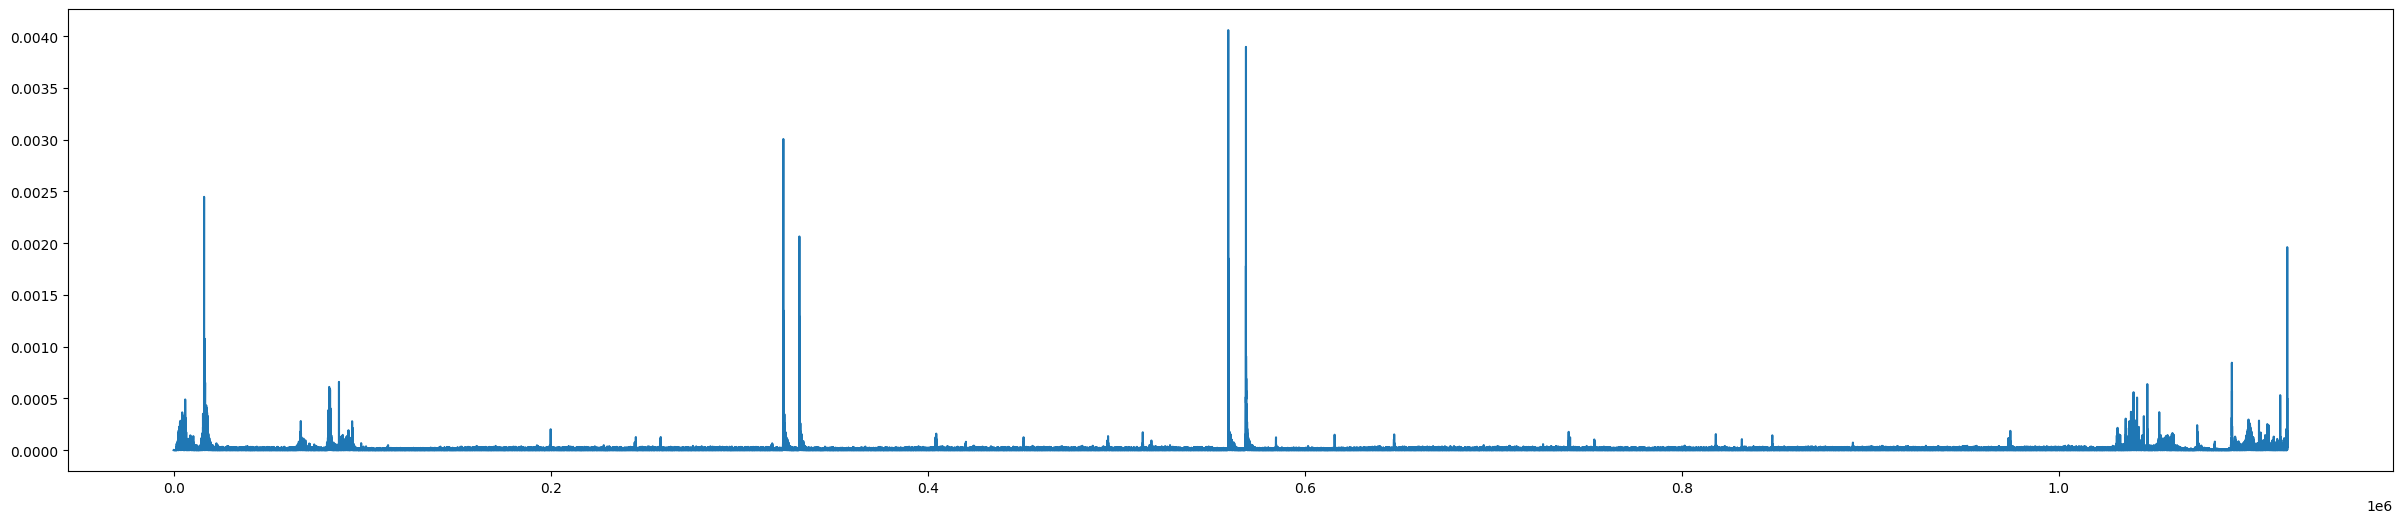

In [3]:
abs_audio = filtered_audio.squeeze().abs()

plt.figure(figsize=(30, 6))
plt.plot(abs_audio)

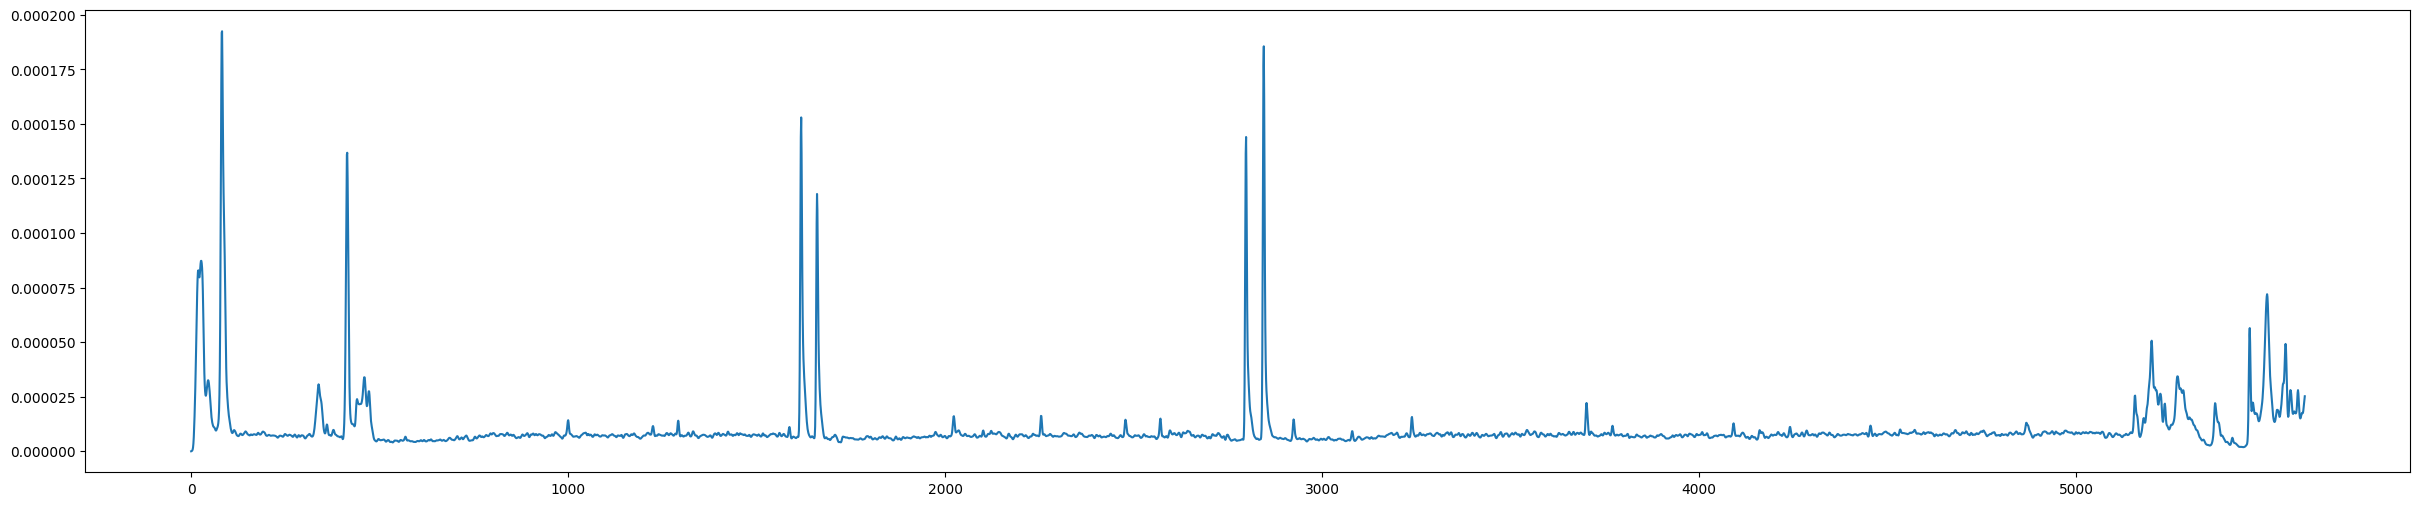

In [10]:
downsample_factor = 200
downsampled_signal = decimate(abs_audio, downsample_factor)

sigma = 2
smoothed_downsampled_signal = gaussian_filter1d(downsampled_signal, sigma)

plt.figure(figsize=(30, 6))
plt.plot(smoothed_downsampled_signal)

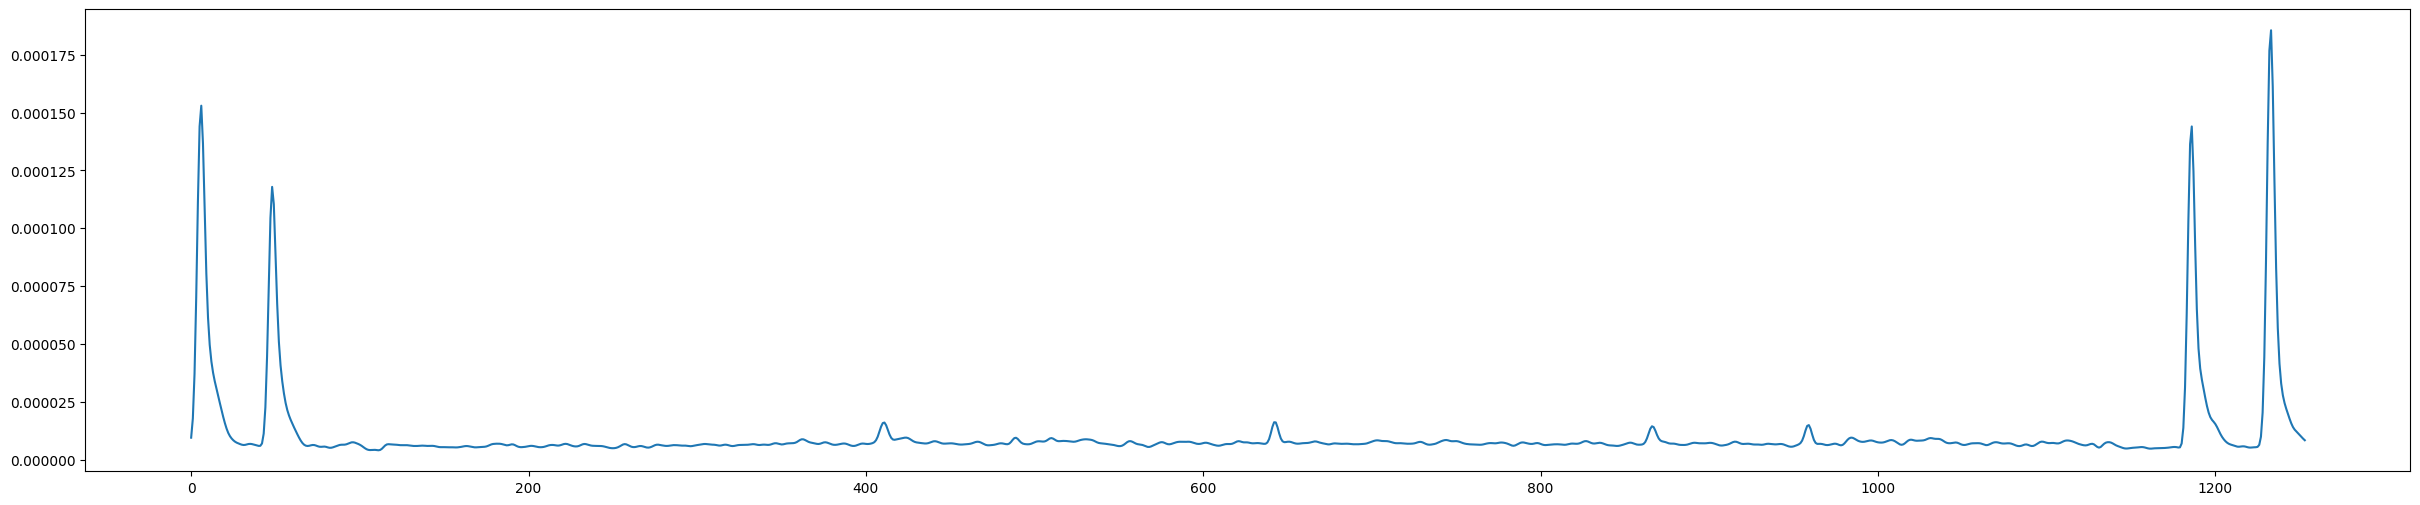

In [11]:
CLICKER_BEGINS_AT = 7.312
CLICKER_ENDS_AT = 13

CLICKER_BEGINS_AT = int(CLICKER_BEGINS_AT * sample_rate / downsample_factor)
CLICKER_ENDS_AT = int(CLICKER_ENDS_AT * sample_rate / downsample_factor)


just_clicker = smoothed_downsampled_signal.copy()[CLICKER_BEGINS_AT:CLICKER_ENDS_AT]

plt.figure(figsize=(30, 6))
plt.plot(just_clicker)